UCS , BIDIRECTIONAL

Enter n:

3x3 Puzzle - UCS Avg: 3.338s, BDS Avg: 0.028s


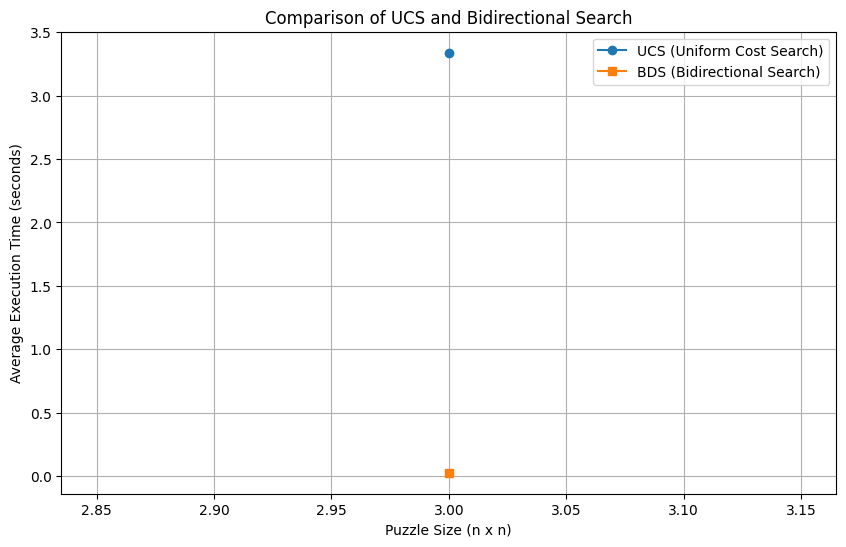

In [2]:
import heapq
import random
import time
import matplotlib.pyplot as plt
from collections import deque

MOVES = [(-1, 0), (1, 0), (0, -1), (0, 1)]  

def generate_puzzle(n):
    while True:
        puzzle = list(range(n * n))
        random.shuffle(puzzle)
        puzzle = [puzzle[i * n:(i + 1) * n] for i in range(n)]
        if is_solvable(puzzle, n):
            return puzzle

def is_solvable(puzzle, n):
    flat_puzzle = [num for row in puzzle for num in row]
    inversions = sum(1 for i in range(len(flat_puzzle)) for j in range(i + 1, len(flat_puzzle))
                     if flat_puzzle[i] and flat_puzzle[j] and flat_puzzle[i] > flat_puzzle[j])
    return (inversions % 2 == 0) if n % 2 == 1 else ((inversions + flat_puzzle.index(0) // n) % 2 == 0)

def find_blank(puzzle):
    for i, row in enumerate(puzzle):
        if 0 in row:
            return i, row.index(0)

def get_neighbors(puzzle):
    x, y = find_blank(puzzle)
    neighbors = []
    for dx, dy in MOVES:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(puzzle) and 0 <= ny < len(puzzle):
            new_puzzle = [row[:] for row in puzzle]  # Deep copy
            new_puzzle[x][y], new_puzzle[nx][ny] = new_puzzle[nx][ny], new_puzzle[x][y]
            neighbors.append(new_puzzle)
    return neighbors

def uniform_cost_search(start, goal):
    pq = [(0, start)]
    visited = set()

    while pq:
        cost, state = heapq.heappop(pq)
        if state == goal:
            return cost
        visited.add(str(state))
        for neighbor in get_neighbors(state):
            if str(neighbor) not in visited:
                heapq.heappush(pq, (cost + 1, neighbor))
    return -1

def bidirectional_search(start, goal):
    forward_queue, backward_queue = deque([(start, 0)]), deque([(goal, 0)])
    forward_visited, backward_visited = {str(start): 0}, {str(goal): 0}

    while forward_queue and backward_queue:
        state, cost = forward_queue.popleft()
        if str(state) in backward_visited:
            return cost + backward_visited[str(state)]
        for neighbor in get_neighbors(state):
            if str(neighbor) not in forward_visited:
                forward_visited[str(neighbor)] = cost + 1
                forward_queue.append((neighbor, cost + 1))

        state, cost = backward_queue.popleft()
        if str(state) in forward_visited:
            return cost + forward_visited[str(state)]
        for neighbor in get_neighbors(state):
            if str(neighbor) not in backward_visited:
                backward_visited[str(neighbor)] = cost + 1
                backward_queue.append((neighbor, cost + 1))

    return -1

def run_tests(n, trials=5):
    total_ucs, total_bds = 0, 0
    goal = [[(i * n + j + 1) % (n * n) for j in range(n)] for i in range(n)]

    for _ in range(trials):
        puzzle = generate_puzzle(n)

        start = time.time()
        uniform_cost_search(puzzle, goal)
        total_ucs += time.time() - start

        start = time.time()
        bidirectional_search(puzzle, goal)
        total_bds += time.time() - start

    avg_ucs = total_ucs / trials
    avg_bds = total_bds / trials
    print(f"\n{n}x{n} Puzzle - UCS Avg: {avg_ucs:.3f}s, BDS Avg: {avg_bds:.3f}s")
    return avg_ucs, avg_bds

def plot_results(n_values, ucs_times, bds_times):
    plt.figure(figsize=(10, 6))

    plt.plot(n_values, ucs_times, marker="o", label="UCS (Uniform Cost Search)")
    plt.plot(n_values, bds_times, marker="s", label="BDS (Bidirectional Search)")

    plt.xlabel("Puzzle Size (n x n)")
    plt.ylabel("Average Execution Time (seconds)")
    plt.title("Comparison of UCS and Bidirectional Search")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    print("Enter n:")
    n_values = int(input()) 
    ucs_times, bds_times = [], []
    ucs_avg, bds_avg = run_tests(n_values)
    ucs_times.append(ucs_avg)
    bds_times.append(bds_avg)
    plot_results(n_values, ucs_times, bds_times)